# Import libraries

In [1]:
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA

# Merging Spreatsheets by year

In [3]:
cwd = os.chdir("../Dataset")
print(cwd)

None


In [91]:
files = os.listdir(cwd)

df_2014 = pd.DataFrame()
df_2015 = pd.DataFrame()
df_2016 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Merging the files for the year: 2014
for f in files:
    if f.endswith(".xls") and "2014" in f:
        df_2014 = df_2014.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2015
for f in files:
    if f.endswith(".xls") and "2015" in f:
        df_2015 = df_2015.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))

# Merging the files for the year: 2016
for f in files:
    if f.endswith(".xls") and "2016" in f:
        df_2016 = df_2016.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2017
for f in files:
    if f.endswith(".xls") and "2017" in f:
        df_2017 = df_2017.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2018
for f in files:
    if f.endswith(".xls") and "2018" in f:
        df_2018 = df_2018.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        

# Profiling / clustering
## Based on people's transactions

Text(0, 0.5, 'ORIGINAL GROSS AMT')

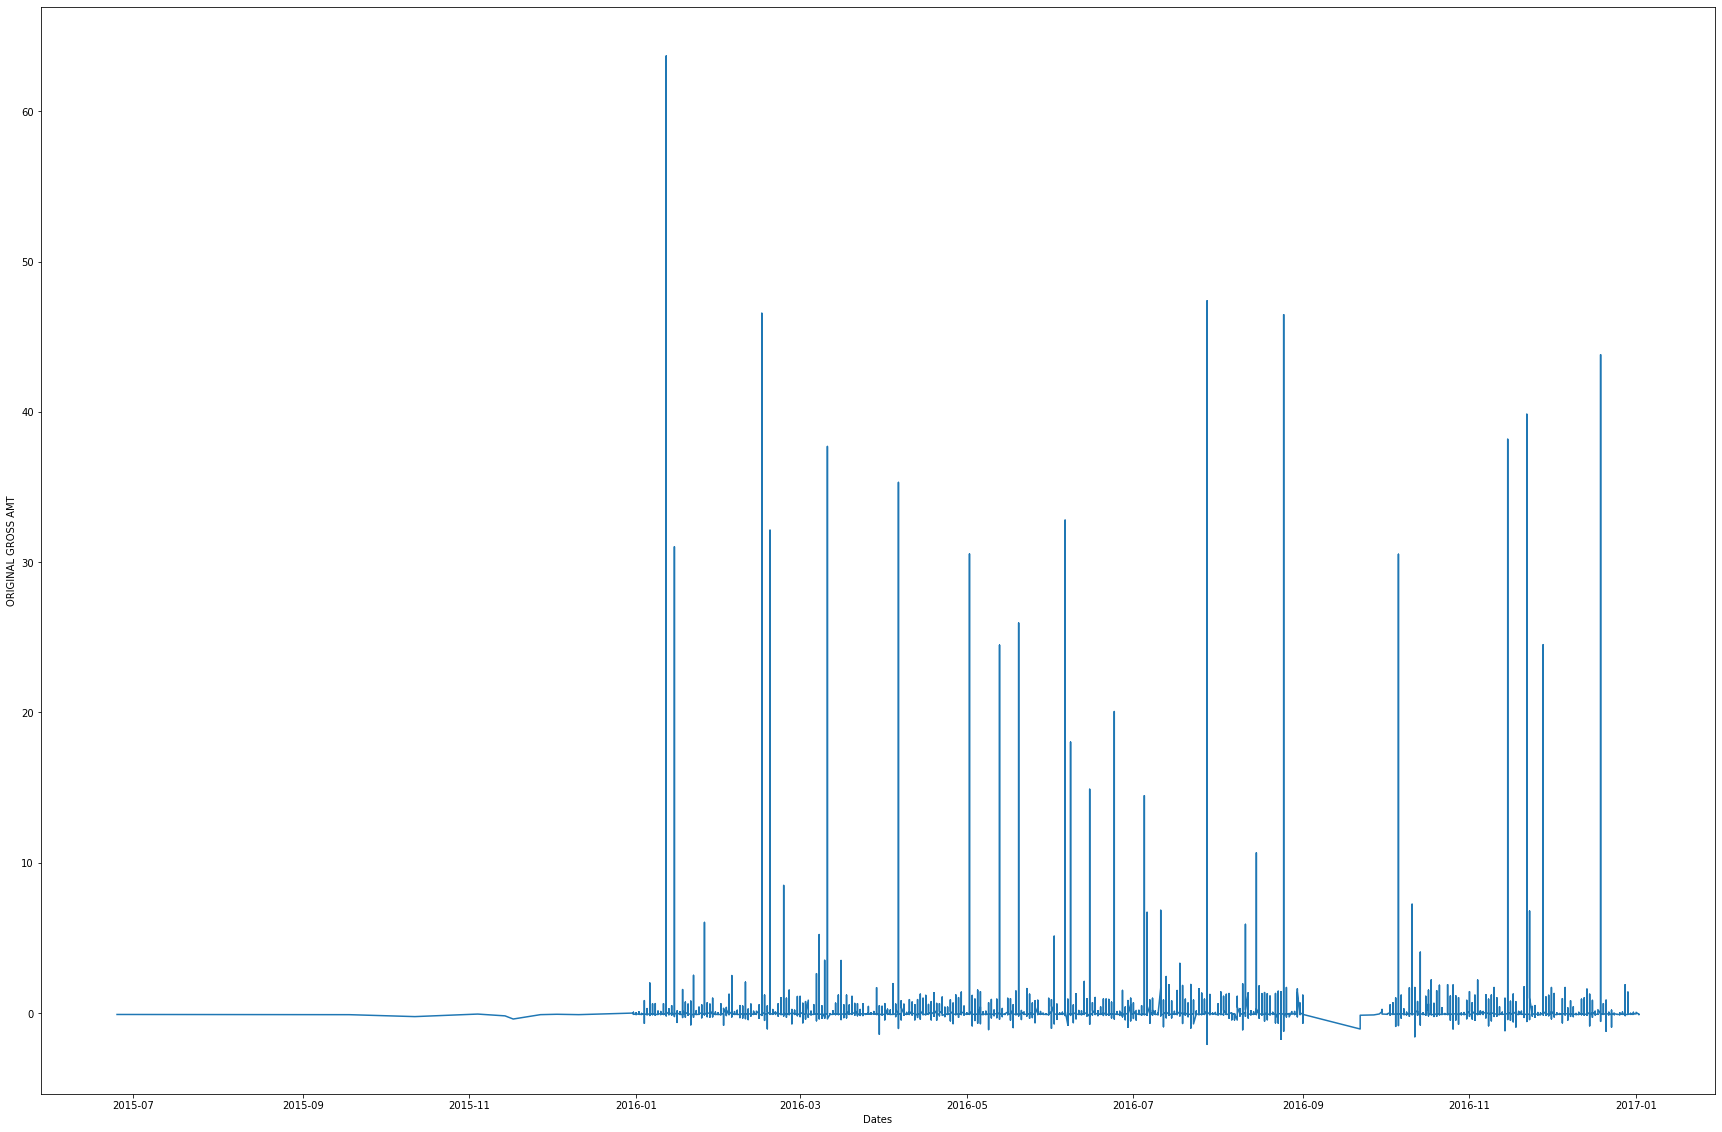

In [90]:
df_2016 = df_2016.drop('Directorates',axis=1)
df_2016 = df_2016.dropna()
df_2016 = df_2016.sort_values(by = 'TRANS DATE')
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

In [ ]:
# Frequency of transactions made in favor of ech unique merchant
merchant_vc = df_2016['MERCHANT NAME'].value_counts()

# Transforming it into a DataFrame
merchant = pd.DataFrame(merchant_vc)
merchant = merchant.reset_index()
merchant.columns = ['unique_merchant','counts']

sum_tr = 0
merchant_trans = pd.DataFrame()
j = 0

# Average amount of transactions for each unique merchant
for m in merchant['unique_merchant']:
    for i in range(len(df_2016['MERCHANT NAME'])):
        if df_2016['MERCHANT NAME'][i] == m:
            sum_tr += df_2016['ORIGINAL GROSS AMT'][i]
    merchant_trans = merchant_trans.append([(sum_tr/merchant['counts'][j])])
    j += 1

# Assembling previous data
merchant_data = pd.DataFrame()
merchant_data['merchant_name'] = merchant['unique_merchant']
merchant_data['trans_avg'] = merchant_trans.values.reshape(-1,1)
merchant_data['frequency'] = merchant['counts']

merchant_data = merchant_data.set_index(merchant_data.merchant_name)
merchant_data = merchant_data.drop(['merchant_name'], axis = 1)

merchant_data

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(merchant_data.frequency,merchant_data.trans_avg)
plt.xlabel("Frequency of transaction made to a merchant")
plt.ylabel("Average transactions")

In [ ]:
# The average number of merchants that receive negative average transactions
negative = 0
for i in range(len(merchant_data)):
    if merchant_data.trans_avg[i]<0:
        negative += 1
        
negativ_avg = negative/len(merchant_data)

negativ_avg

In [ ]:
### Converting categorical variables about people into numerical ones (Feature engineering)

# Frequency of transactions made by ech unique card number
card_num_vc = df_2016['CARD NUMBER'].value_counts()

# Transforming it into a DataFrame
card_num = pd.DataFrame(card_num_vc)
card_num = card_num.reset_index()
card_num.columns = ['unique_values','counts']

sum_tr = 0
card_trans = pd.DataFrame()
j = 0

# Average amount of transactions for each unique card
for card in card_num['unique_values']:
    for i in range(len(df_2016['CARD NUMBER'])):
        if df_2016['CARD NUMBER'][i] == card:
            sum_tr += df_2016['ORIGINAL GROSS AMT'][i]
    card_trans = card_trans.append([(sum_tr/card_num['counts'][j])])
    j += 1

# Assembling previous data
card_data = pd.DataFrame()
card_data['card_number'] = card_num['unique_values']
card_data['trans_avg'] = card_trans.values.reshape(-1,1)
card_data['frequency'] = card_num['counts']

card_data = card_data.set_index(card_data.card_number)
card_data = card_data.drop(['card_number'], axis = 1)

card_data


In [ ]:
plt.figure(figsize=(30,20))
plt.plot(card_data.frequency,card_data.trans_avg)
plt.xlabel("Frequency of usage of transaction cards")
plt.ylabel("Average transactions")

In [ ]:
# The average number of transaction cards that have negative average transactions
sum_trans = 0
for i in range(len(card_data)):
    if card_data.trans_avg[i]<0:
        sum_trans += 1
        
sum_trans_avg = sum_trans/len(card_data)

sum_trans_avg

# Preprocessing

In [ ]:
# # Dropping rows that contain NULL values from all DataFrames
df_2014 = df_2014.dropna()
df_2015 = df_2015.dropna()
df_2016 = df_2016.drop('Directorates',axis=1)
df_2016 = df_2016.dropna()
df_2017 = df_2017.dropna()
df_2018 = df_2018.dropna()

# # Standardizing the ORIGINAL GROSS AMT variable
df_2014_orig_gross_amt= pd.DataFrame(df_2014['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2015_orig_gross_amt= pd.DataFrame(df_2015['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2016_orig_gross_amt= pd.DataFrame(df_2016['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2017_orig_gross_amt= pd.DataFrame(df_2017['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2018_orig_gross_amt= pd.DataFrame(df_2018['ORIGINAL GROSS AMT'].values.reshape(-1, 1))

df_2014['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2014_orig_gross_amt)
df_2015['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2015_orig_gross_amt)
df_2016['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2016_orig_gross_amt)
df_2017['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2017_orig_gross_amt)
df_2018['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2018_orig_gross_amt)

# # Standardizing the BILLING GROSS AMT variable 

df_2017['BILLING GROSS AMT'] = StandardScaler().fit_transform(df_2017['BILLING GROSS AMT'].values.reshape(-1, 1))
df_2018['BILLING GROSS AMT'] = StandardScaler().fit_transform(df_2018['BILLING GROSS AMT'].values.reshape(-1, 1))

# # Standardizing the TRANS TAX AMT variable
df_2017['TRANS TAX AMT'] = StandardScaler().fit_transform(df_2017['TRANS TAX AMT'].values.reshape(-1, 1))

# # Sorting values by date
df_2014 = df_2014.sort_values(by = 'TRANS DATE')
df_2015 = df_2015.sort_values(by = 'TRANS DATE')
df_2016 = df_2016.sort_values(by = 'TRANS DATE')
df_2017 = df_2017.sort_values(by = 'TRANS DATE')
df_2018 = df_2018.sort_values(by = 'TRANS DATE')

In [ ]:
df = df_2016
df.head()

# Exploratory analysis

In [ ]:
df.info()

In [ ]:
# Analyse the original gross amt variable;

df['ORIGINAL GROSS AMT'].describe()

In [ ]:
df['TRANS VAT DESC'].value_counts()

In [ ]:
df['MERCHANT NAME'].value_counts()

In [ ]:
df['TRANS CAC CODE 1'].value_counts()

In [ ]:
df['TRANS CAC DESC 1'].value_counts()

In [ ]:
df['TRANS CAC CODE 2'].value_counts()

In [ ]:
df['TRANS CAC DESC 2'].value_counts()

In [ ]:
df['TRANS CAC CODE 3'].value_counts()

In [ ]:
df['Directorate'].value_counts()

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

In [ ]:
### Here we will do clustering using the KMeans algorithms
# Scaling the frequency of transactions by means amount of transactions
card_tr = card_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(card_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

In [ ]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(card_tr)
kmeans_predict = kmeans_model.predict(card_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(card_tr[:,1],card_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transactions made by each person')

## Based on merchants

In [ ]:
### Converting categorical variables about marchants into numerical ones

# Frequency of transactions made in favor of ech unique merchant
merchant_vc = df['MERCHANT NAME'].value_counts()

# Transforming it into a DataFrame
merchant = pd.DataFrame(merchant_vc)
merchant = merchant.reset_index()
merchant.columns = ['unique_merchant','counts']

sum_tr = 0
merchant_trans = pd.DataFrame()
j = 0

# Average amount of transactions for each unique merchant
for m in merchant['unique_merchant']:
    for i in range(len(df['MERCHANT NAME'])):
        if df['MERCHANT NAME'][i] == m:
            sum_tr += df['ORIGINAL GROSS AMT'][i]
    merchant_trans = merchant_trans.append([(sum_tr/merchant['counts'][j])])
    j += 1

# Assembling previous data
merchant_data = pd.DataFrame()
merchant_data['merchant_name'] = merchant['unique_merchant']
merchant_data['trans_avg'] = merchant_trans.values.reshape(-1,1)
merchant_data['frequency'] = merchant['counts']

merchant_data = merchant_data.set_index(merchant_data.merchant_name)
merchant_data = merchant_data.drop(['merchant_name'], axis = 1)

merchant_data

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(merchant_data.frequency,merchant_data.trans_avg)
plt.xlabel("Frequency of transaction made to a merchant")
plt.ylabel("Average transactions")

In [ ]:
# The average number of merchants that receive negative average transactions
negative = 0
for i in range(len(merchant_data)):
    if merchant_data.trans_avg[i]<0:
        negative += 1
        
negativ_avg = negative/len(merchant_data)

negativ_avg

In [ ]:
### Here we will do clustering using the KMeans algorithms
# Scaling the frequency of transactions by means amount of transactions
merchant_tr = merchant_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(merchant_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

In [ ]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(merchant_tr)
kmeans_predict = kmeans_model.predict(merchant_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(merchant_tr[:,1],merchant_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transaction made by each person')

## One-Class SVM

In [ ]:
# Splitting the ORIGINAL GROSS AMOUNT time series data into training and testing datasets (70%+30%)

train_set = df.iloc[0:int(len(df)*0.7),1]
test_set = df.iloc[int(len(df)*0.7)+1:len(df),1]

In [ ]:
# Training the One-Class SVM model 

ocsvm_model = OneClassSVM(gamma ="auto",nu=0.0025).fit(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_model.predict(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_decision_func = ocsvm_model.decision_function(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_score = ocsvm_model.score_samples(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))

df['INT_TIME'] = df.index.astype(np.int64)
df['ocsvm_decis_func'] = ocsvm_decision_func
anomaly = df.loc[df['ocsvm_decis_func']<0, ['INT_TIME','ORIGINAL GROSS AMT']]
normal = df.loc[df['ocsvm_decis_func']>=0, ['INT_TIME','ORIGINAL GROSS AMT']]

fig, ax = plt.subplots(figsize=(10,15))
ax.plot(df['INT_TIME'],df['ORIGINAL GROSS AMT'], color='blue',label='Normal')
ax.scatter(anomaly['INT_TIME'],anomaly['ORIGINAL GROSS AMT'], color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('ORIGINAL GROSS AMT')
plt.legend('Anomaly detection using OCSVM')
plt.show()

In [ ]:
anomaly_fraction = len(anomaly)/len(df['ORIGINAL GROSS AMT'])
anomaly_fraction

# Forecasting future transactional behavior

In [ ]:
# splitting training set and test test ona 70%:30% basis from the normal dataset extracted from oncsvm anomaly detection
normal_original_gross_amt = normal['ORIGINAL GROSS AMT']

train_set = normal.iloc[0:int(len(normal)*0.7),1]
train_set.index = pd.DatetimeIndex(train_set.index).to_period('D')
test_set = normal.iloc[int(len(normal)*0.7)+1:len(normal),1]
test_set.index = pd.DatetimeIndex(test_set.index).to_period('D')

In [ ]:
# Forecasting using the ARIMA model

autocorrelation_plot(train_set[0:20])
plt.figure(figsize=(25,20))
plt.show()

In [ ]:
arima_model = ARIMA(train_set, order=(2,0,7))
arima_model_fit = arima_model.fit()

In [ ]:
print(arima_model_fit.summary())

In [ ]:
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
history = [x for x in train_set]
predictions = list()
# walk-forward validation
for t in range(len(test_set)):
    model = ARIMA(history, order=(0,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_set[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_set, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test_set)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
series = normal['ORIGINAL GROSS AMT']
series.index = pd.DatetimeIndex(series.index).to_period('D')

X = series.values
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()